In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats import weightstats as stests

plt.rcParams['figure.figsize']=[15,6]

In [2]:
age = np.array([42, 44, 62, 35,20,30, 56, 20, 23, 41,55, 22, 31, 27, 66,21, 18, 24, 42, 25,32, 50, 31, 26, 36,39, 40, 18, 36, 22])

### Q1. Compute the mean, median and the mode of the data

In [3]:
avg = np.mean(age)
median = np.median(age)
mod = statistics.mode(age)

print(f'The mean of the data: {round(avg,2)}')
print(f'The median of the data: {median}')
print(f'The mode of the data: {mod}')

The mean of the data: 34.47
The median of the data: 31.5
The mode of the data: 42


### Q2. Compute the range , variance and standard deviation of customer ages

In [4]:
ran = age.max()-age.min()
std = np.std(age,ddof=1)
var = std**2

print(f'The range of the data: {ran}')
print(f'The variance of the data: {round(var,2)}')
print(f'The standard variance of the data: {round(std,2)}')

The range of the data: 48
The variance of the data: 177.36
The standard variance of the data: 13.32


### Q3. Find the mean deviation for the data

Mean Devation  is the sum of absolute value of difference of datapoint with mean and divided by number of observations

In [5]:
num = sum(abs(age-avg))
denom = len(age)
Mean_deviation = num/denom

print(f'The mean deviation of the data is: {round(Mean_deviation,2)}')

The mean deviation of the data is: 10.76


### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

Pearson formula for calculation of skewness coefficient is 3 times difference between mean and median and divided by standard deviation. 

In [6]:
num = 3*(avg-median)
denom = std
skewness = num/denom

print(f'The Coefficient of Skewness is: {round(skewness,2)}')

The Coefficient of Skewness is: 0.67


As the skewness is greater than 0. We say that the data is positively skewed.

### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [7]:
num = age-avg
denom = std
z_score = num/denom
z_score

array([ 0.56566358,  0.71583975,  2.0674253 ,  0.04004698, -1.08627431,
       -0.33539345,  1.61689678, -1.08627431, -0.86101005,  0.4905755 ,
        1.5418087 , -0.93609814, -0.26030536, -0.56065771,  2.36777764,
       -1.01118622, -1.23645048, -0.78592197,  0.56566358, -0.71083388,
       -0.18521728,  1.16636827, -0.26030536, -0.63574579,  0.11513507,
        0.34039932,  0.41548741, -1.23645048,  0.11513507, -0.93609814])

In [8]:
two_std = []
for i in z_score:
    if i > -2 and i < 2:
        two_std.append(i)
    else:
        continue

In [9]:
round((len(two_std)/len(age))*100)

93

### Q6. Find the three quartiles and the interquartile range (IQR)

In [10]:
q1 = np.quantile(age,0.25)
q2 = np.quantile(age,0.50)
q3 = np.quantile(age,0.75)
iqr = q3-q1

print('First Quantile:',q1)
print('Second Quantile:',q2)
print('Third Quantile:',q3)
print('Interquantile Range:',iqr)

First Quantile: 23.25
Second Quantile: 31.5
Third Quantile: 41.75
Interquantile Range: 18.5


### Q7. Are there any outliers in the data set ?

In [11]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr

outliers = []
for i in age:
    if i>upper or i<lower:
        outliers.append(i)
    else:
        continue

In [12]:
outliers

[]

As the outliers list is empty. It means there are no outliers in the data.

### Q8. Draw a boxplot of the dataset to confirm .

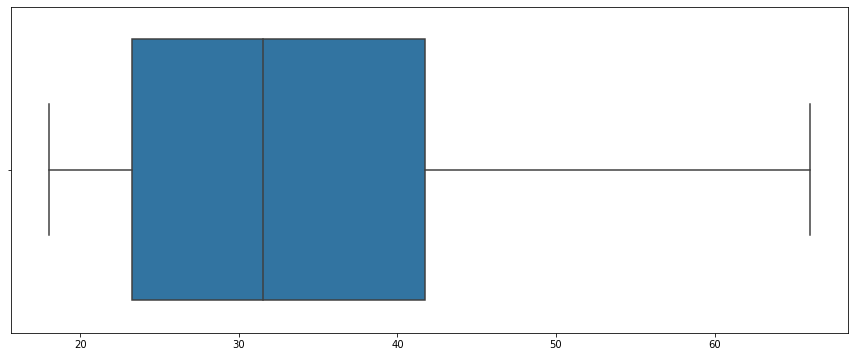

In [13]:
sns.boxplot(age)
plt.show()

There are no outliers

### Q9. Find the percentile rank of the datapoint 50.

In [14]:
age_df = pd.DataFrame(age,columns = ['Age'])
age_df['Percentile_Rank'] = age_df['Age'].rank(pct=True)
age_df[age_df['Age']==50]

,Age,Percentile_Rank
21,50,0.866667


Percentile Rank of 50 is 0.86667

### Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [15]:
prob = len(age_df[age_df['Age']>50])/len(age_df)

print('The probability that a person ordering an EV scooter is above 50 years old:',round(prob,2))

The probability that a person ordering an EV scooter is above 50 years old: 0.13


### Q11. Create a frequency distribution for the data and visualize it appropriately

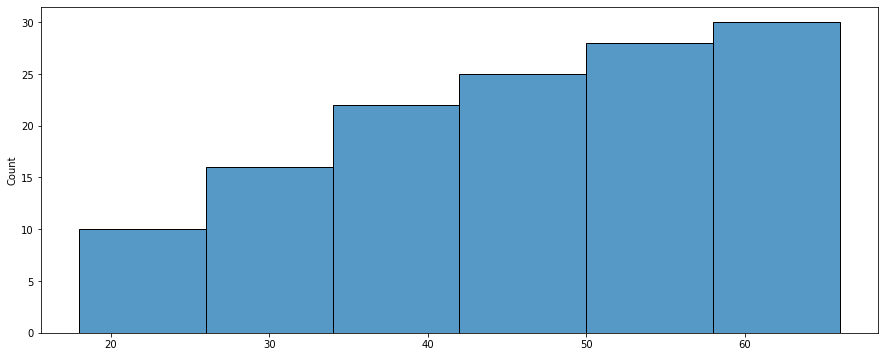

In [16]:
sns.histplot(age,cumulative=True)
plt.show()

### Q12. Create a probability distribution of the data and visualize it appropriately.

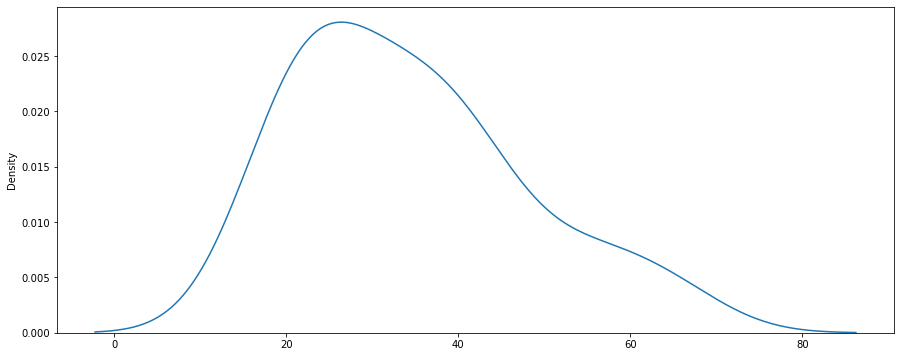

In [17]:
sns.kdeplot(age)
plt.show()

### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

The data is right skewed. 

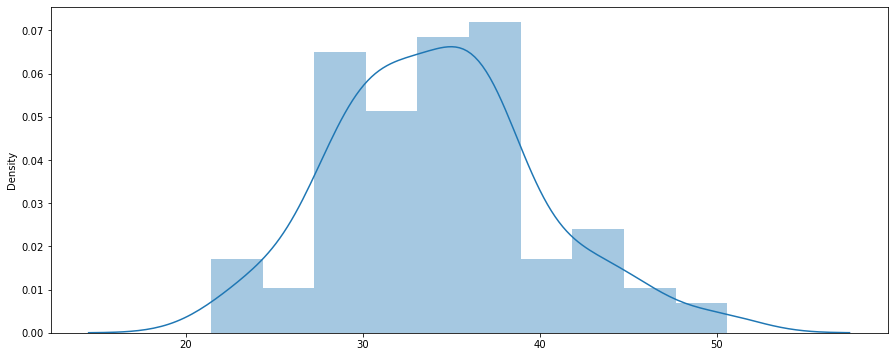

In [18]:
# for sample size 5
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,5))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

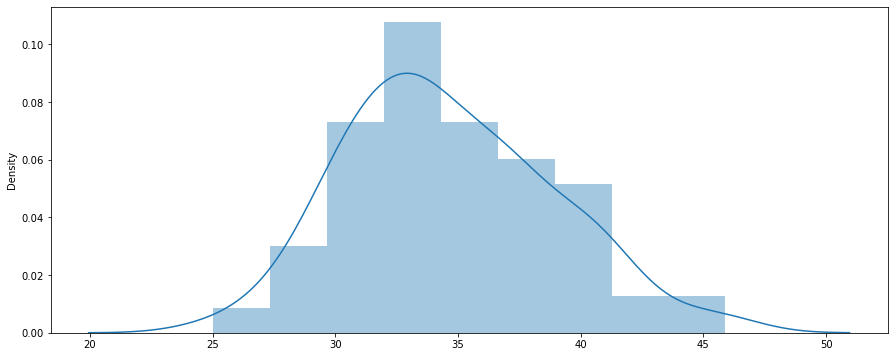

In [19]:
# for sample size 10
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,10))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

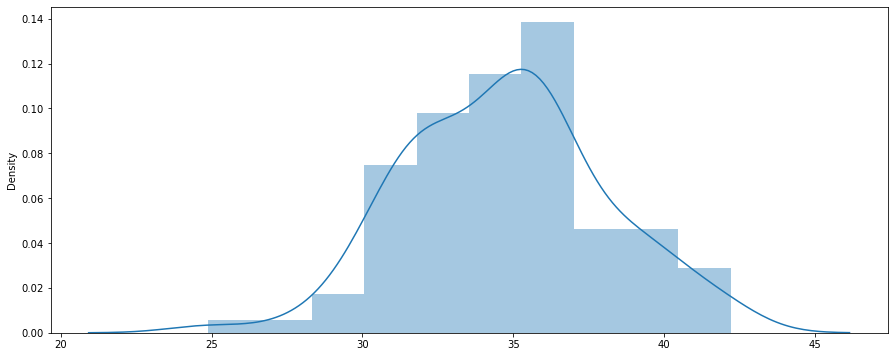

In [20]:
# for sample size 15
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,15))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

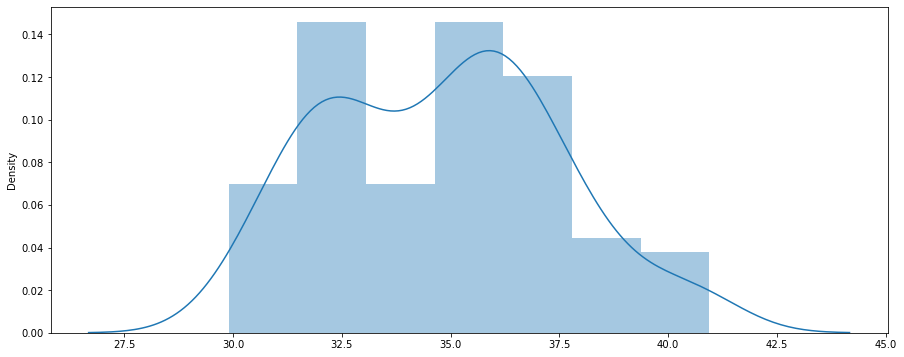

In [21]:
# for sample size 20
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,20))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

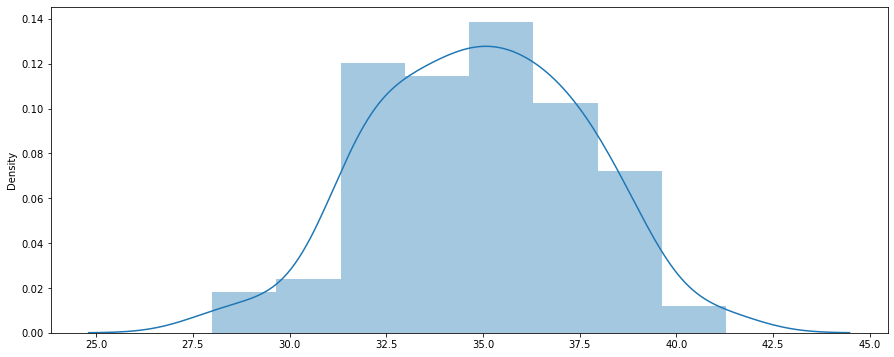

In [22]:
# for sample size 25
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,25))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

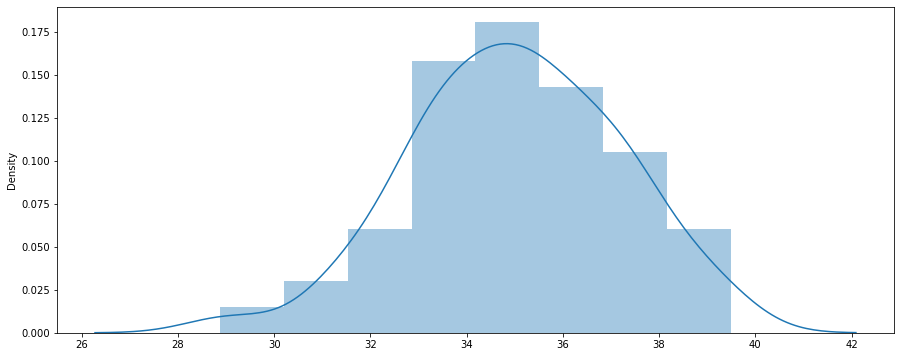

In [23]:
# for sample size 30
np.random.seed(1)
mean = []

for i in range(100):
    x = np.mean(np.random.choice(age,30))
    mean.append(x)
    
sns.distplot(mean)
plt.show()

### Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [24]:
p = 6/10
n = 10
x = 6

prob = stats.binom.pmf(x,n,p)
print('The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is:', round(prob,2))

The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is: 0.25


### Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age. [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [55]:
n = 300
p = 0.1
q=1-p
prob1 = stats.norm.cdf(24.5,loc=n*p,scale=np.sqrt(n*p*q))
prob1

0.14491935880375412

In [56]:
prob2 = stats.norm.cdf(25,loc=n*p,scale=np.sqrt(n*p*q))
prob2

0.16796190657586785

In [57]:
prob3 = stats.norm.cdf(25.5,loc=n*p,scale=np.sqrt(n*p*q))
prob3

0.19323811538561636

### Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [28]:
# As the length of the dataset is 30 we will use z distribution.
# Confidence Interval = point estimate +/- z_score * std error
c = 0.95
alpha = 1-c
avg = np.mean(age)
std = np.std(age,ddof=1)
n = len(age)
z_score = stats.norm.isf(alpha/2)

upper_limit = avg + z_score * (std/np.sqrt(n))
lower_limit = avg - z_score * (std/np.sqrt(n))

print('The 95% Confidence Interval for the mean is:',[round(lower_limit,2),round(upper_limit,2)])

The 95% Confidence Interval for the mean is: [29.7, 39.23]


In [29]:
print('The 95% Confidence Interval for the mean is:',stats.norm.interval(0.95,loc = avg, scale = std/np.sqrt(n)))

The 95% Confidence Interval for the mean is: (29.70107936877694, 39.23225396455639)


### Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary

In [30]:
p = 0.20
q = 1-p
C = 0.95
alpha = 1-C
z_score = stats.norm.isf(alpha/2)
n = (z_score*(np.sqrt(p*q)/0.02))**2
round(n)

1537




### Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [31]:
C = 0.90
alpha = 1-C
z_score = stats.norm.isf(alpha/2)
n = (z_score*(np.sqrt(p*q)/0.05))**2
round(n)

173

### Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

In [32]:
alpha = 0.05
n = 30
p = 5/30
q = 1-p

In [33]:
# 1. State the Hypotheses
# Ho: p = 0.20 Ha: p <> 0.20

# 2. Decision Criteria
# Two tail test
z_critical = stats.norm.isf(alpha/2)

# 3. Compute the sample statisic
num = p - 0.20
denom = np.sqrt(p*q/n)
z = num/denom

print('z:',round(z,2))
print('z_critical',round(z_critical,2))

z: -0.49
z_critical 1.96


In [34]:
# 4. Critical value method
# z is greater than z critical. It lies in the safe zone. We do not reject the null hypothesis.

In [35]:
# 5. Pvalue method
Pvalue = 2*(stats.norm.cdf(z))

print('Pvalue:',round(Pvalue,2))
print('Alpha:',alpha)

Pvalue: 0.62
Alpha: 0.05


In [36]:
# Pvalue is greater than alpha. we donnot reject the null hypothesis.

### Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4.
* a. Show why you support Zen’s claim using the P-value obtained.
* b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]
* c. Write a summary of results and the action that Zen must take to remedy the complaints.
* d. What is your position on performing the test for variability along with the test for means?

In [58]:
# a

avg = 91.3
std = 14.4
alpha = 0.05
n=40
# Ho:mu=96    Ha: mu<> 96

#  Decision Criteria
# Two Tail Test
z_critical = stats.norm.isf(alpha/2)

# Critical value method
num = avg-96
denom = std/np.sqrt(40)
z = num/denom

print('z_critical:',z_critical)
print('z:',z)

z_critical: 1.9599639845400545
z: -2.0642645837210267


In [59]:
# Pvalue method
pvalue = 2*stats.norm.cdf(z)

print('Pvalue:',pvalue)
print('Alpha:',alpha)

Pvalue: 0.03899263702552719
Alpha: 0.05


* As the Z critical is greater than z statistic. It fall in the rejection zone. We reject the null hypothesis.
* Pvalue is less than alpha. We reject the null hypothesis
* From the evidence we can conclude than the claim of the company that their mileage is 96 may be false.

In [65]:
# b
s = 7.2
std = 14.4
n = 40
alpha=0.05
# Ho: std=7.2  Ha: std<>7.2

# Decision Criteria

chi_2_critical = stats.chi2.isf(alpha,df=n-1)

# Critical value method
num = (n-1)*(s**2)
denom = std**2
chi2_statistic = num/denom

# pvalue method
pvalue = 2*stats.chi2.sf(chi2_statistic,df=n-1)

print('Chi_2_Critical:',chi_2_critical)
print('chi2_statistic:',chi2_statistic)
print('Pvalue:',pvalue)
print('Alpha:',alpha)

Chi_2_Critical: 54.57222775894174
chi2_statistic: 9.75
Pvalue: 1.999999039407618
Alpha: 0.05


* Chi2 statistic is smaller tha chi2 critical. It fall in safe zone. We fail to reject the null hypothesis
* Pvalue is greater than alpha. We fail to reject null hypothesis
* From the evidence we can conclude than the company's claim can be true.

------------------------------------------x----------------------------------x----------------------------------------x------------------------------------x--------------------------------------

* Descriptive analytics is the process of analysing historical data to better understand the changes that have occurred in a business. Descriptive analytics can help to identify the areas of strength and weakness in an organization. Examples of metrics used in descriptive analytics include year-over-year pricing changes, month-over-month sales growth, the number of users, or the total revenue per subscriber.

* In its simplest form, descriptive analytics answers the question, "What happened?" Descriptive analytics uses central tendencies, distribution of the data and measure of dispersions to answer "What happened?"

* On the other hand, the goal of inferential analytics is to provide measurements that can describe the overall population of a research project by studying a smaller sample of it. Inferential statistics enables one to make descriptions of data and draw inferences and conclusions from the respective data.

* In the above solved questions, question 1 to 13 relates to descriptive analysis and in the rest, we are employing inferential statistics to draw conclusions.